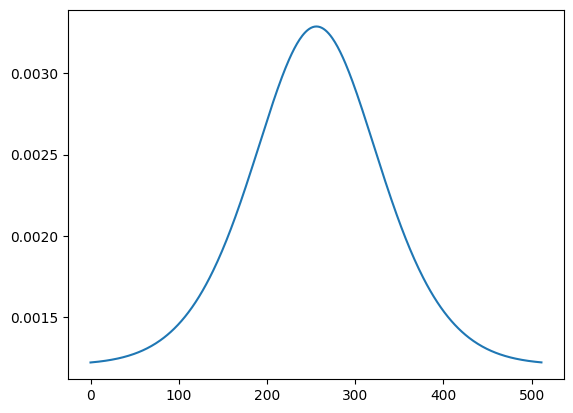

sample: tensor([[1.6726e-35, 9.6791e-31, 5.7923e-34, 1.3251e-35, 1.0564e-30, 9.0280e-27,
         9.1895e-32, 1.8901e-27, 1.4341e-29, 1.9350e-19, 1.3652e-25, 2.0988e-32,
         1.0656e-33, 8.8079e-29, 2.1027e-26, 2.1745e-33, 9.9522e-36, 2.6581e-38,
         4.9003e-24, 1.1810e-31, 9.6564e-29, 4.1227e-32, 7.1748e-33, 9.7952e-31,
         2.9263e-32, 2.0637e-33, 2.0141e-24, 1.5899e-34, 1.8995e-26, 5.2511e-30,
         5.7804e-34, 1.7124e-26, 6.3288e-11, 1.2113e-20, 1.7206e-32, 9.0051e-37,
         4.6602e-29, 4.0735e-26, 1.4911e-25, 2.3053e-35, 7.6326e-31, 1.1078e-29,
         1.4096e-31, 1.1208e-26, 5.7517e-29, 3.6971e-33, 8.0941e-32, 3.0523e-30,
         2.6476e-33, 2.3920e-20, 4.3040e-26, 5.7576e-25, 9.8427e-20, 3.4807e-37,
         2.3880e-33, 3.5129e-33, 3.1265e-22, 4.0734e-21, 2.9477e-28, 2.5759e-29,
         2.6765e-31, 2.5025e-27, 4.1929e-31, 4.0098e-29, 2.1692e-28, 1.6798e-28,
         4.7460e-38, 5.8186e-31, 2.4304e-20, 1.2864e-30, 1.1925e-23, 8.3536e-23,
         3.9883e-30,

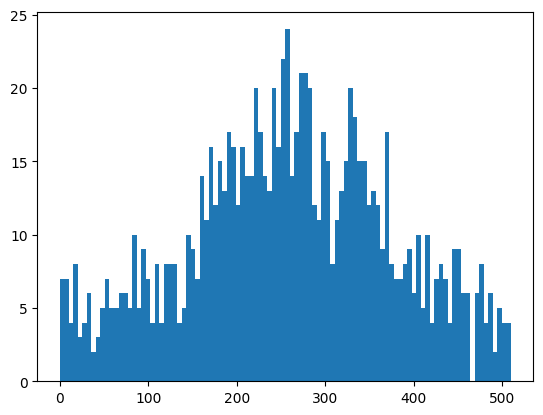

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create 1,512 tensor filled with the values of a bell curve

# Create a 1x512x1 tensor
tensor = torch.zeros(1, 512)

# Create a range from 0 to 511
x = torch.arange(0, 512)

# Normalize and center the range around 0
x = (x - 256) / 256  # Adjust this division for different spread

# Mean and standard deviation for the Gaussian
mu = 0
sigma = 1 / 3  # Adjust sigma for different spread

# Apply the Gaussian function
gaussian = torch.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Replace the tensor values
tensor[0, :] = gaussian

probs = torch.softmax(tensor, dim=1)

log_probs = torch.log(probs)

plt.plot(probs[0, :].numpy())
plt.show()

hard=True
tau=0.1

# Make a histogram of 1000 gumbel softmax samples from the tensor
hist = []
for i in range(1000):
    sample = torch.nn.functional.gumbel_softmax(tensor, tau=tau, hard=hard, dim=-1)
    
    print(f'sample: {sample}')
    
    indices = torch.arange(0, 512)[None, :]
   
    idx = torch.sum(sample * indices, dim=1)
    
    hist.append(idx.item())
    
plt.hist(hist, bins=100)
plt.show()